<a href="https://colab.research.google.com/github/allanspadini/livro-val-allan/blob/main/capitulo1/capitulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
url = 'https://github.com/allanspadini/livro-val-allan/raw/main/GlobalLandTemperaturesByCountry.csv'

In [15]:
import pandas as pd

In [16]:
dados = pd.read_csv(url)

In [17]:
dados.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')

In [5]:
dados.columns = ['Data', 'Temperatura', 'Incerteza', 'País']

In [6]:
dados.head()

Data  Temperatura  Incerteza   País
0  1743-11-01        4.384      2.294  Åland
1  1743-12-01          NaN        NaN  Åland
2  1744-01-01          NaN        NaN  Åland
3  1744-02-01          NaN        NaN  Åland
4  1744-03-01          NaN        NaN  Åland

In [7]:
dados['Data'].max()

'2013-09-01'

In [8]:
dados_br = dados.query('País == "Brazil"')

In [9]:
dados_nulos = dados_br.isnull().sum()
dados_nulos

Data            0
Temperatura    17
Incerteza      17
País            0
dtype: int64

In [ ]:
dados_br.dropna(inplace=True)

In [11]:
dados_br['Temperatura'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: Temperatura, dtype: float64

In [12]:
import seaborn as sns

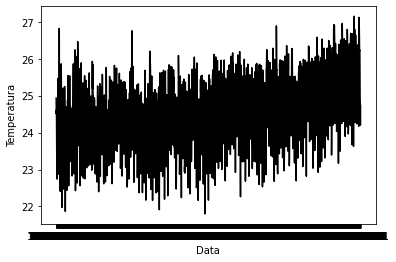

In [13]:
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')

In [18]:
dados_br['Data'] = pd.to_datetime(dados_br['Data'], format='%Y-%m-%d')

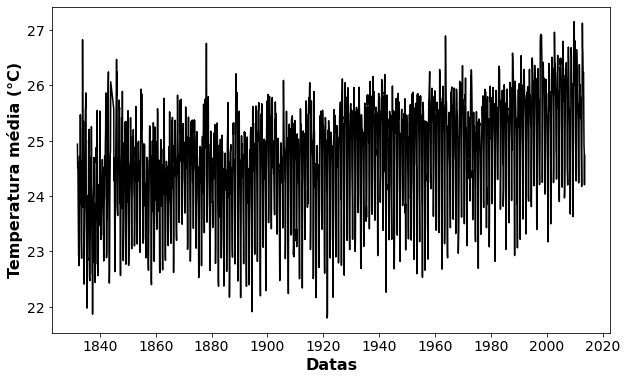

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) #Ajuste do tamanho da imagem
plt.rcParams['font.size'] = '14' # Ajuste do tamanho da fonte
sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='black')
plt.xlabel('Datas', weight = 'bold', fontsize=16) # Nome do eixo x
plt.ylabel('Temperatura média (°C)', weight = 'bold', fontsize=16) # Nome do eixo y
plt.show()

In [24]:
dados_br['Mês'] = pd.DatetimeIndex(dados_br['Data']).month

In [27]:
dados_br

Data  Temperatura  Incerteza    País  Mês
77110 1832-01-01       24.935      1.372  Brazil    1
77111 1832-02-01       24.505      1.953  Brazil    2
77112 1832-03-01       24.617      1.359  Brazil    3
77113 1832-04-01       23.990      2.013  Brazil    4
77114 1832-05-01       23.124      1.592  Brazil    5
...          ...          ...        ...     ...  ...
79285 2013-04-01       25.464      0.253  Brazil    4
79286 2013-05-01       24.906      0.236  Brazil    5
79287 2013-06-01       24.788      0.251  Brazil    6
79288 2013-07-01       24.202      0.201  Brazil    7
79289 2013-08-01       24.736      0.247  Brazil    8

[2164 rows x 5 columns]

In [25]:
temperatura = dados_br.groupby(['Mês']).mean()

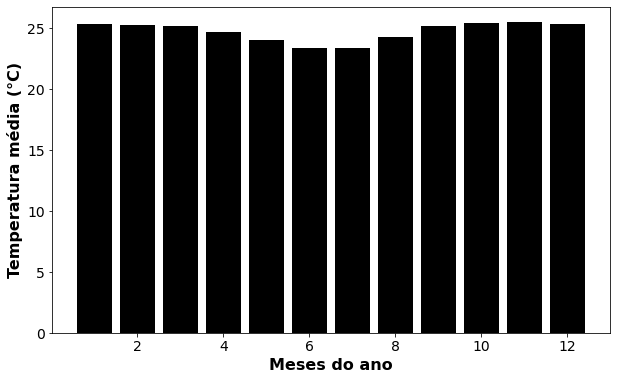

In [26]:
plt.figure(figsize=(10,6)) 
plt.rcParams['font.size'] = '14'
plt.bar(temperatura.index, temperatura['Temperatura'].values, color='black')
plt.xlabel('Meses do ano', weight = 'bold', fontsize=16) 
plt.ylabel('Temperatura média (°C)', weight = 'bold', fontsize=16)
plt.show()

In [28]:
media_movel = dados_br['Temperatura'].rolling(30).mean()

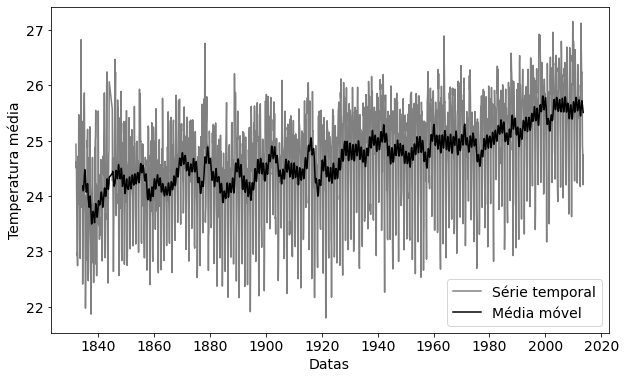

In [30]:
plt.figure(figsize=(10,6))
plt.rcParams['font.size'] = '14'

sns.lineplot(x='Data', y='Temperatura', data=dados_br, color='gray')
plt.xlabel('Datas')
plt.ylabel('Temperatura média')


sns.lineplot(x='Data', y=media_movel, data=dados_br, color='black')
plt.legend(labels=['Série temporal', 'Média móvel'])
plt.show()